### 3th Homework - Adaboost on the Adult Dataset (census Income) 

Use the Adult dataset to build an AdaBoost classifier that predicts whether an individual's income exceeds $50K/year based on their demographic and employment information. The dataset is already loaded.

1. Preprocess the dataset. Handle the missing values. For the numerical features apply the `StandardScaler` and for the categorical ones apply one-hot encoding. Create a train/test split with the ratio 80/20. (1 points)
2. Create an `AdaBoostClassifier`. The classifier has to use a `DecisionTreeClassifier` as an `estimator` with `max_depth=2`. Use `n_estimater=10`.   (1 point)
3. The ROC (Reciever Operating Characteristic) curve is widely used for the evaluation of binary classification problems. It is a plot of the TPR (True Positive Rate) as a function of FPR (False Positive Rate) as we change the threshold used for the final prediction (If the predicted probability is greater than or equal to the threshold, the instance is classified as positive; otherwise, it is classified as negative.). Plot the ROC curve of your estimator and calculate the AUC score , which is the area under the curve (there are built in functions for these). Find the optimal operating point of your classifier (the one closest to the top left point), what is the threshold in this case? Interpret your curve! (2 points).
5. Plot the precision-recall (PR) curve. The precision is the ratio of true positive predictions to the total number of positive predictions (true positives + false positives). The recall is the ratio of true positive predictions to the total number of actual positives (true positives + false negatives). Find the optimal operating ploint (closest to the top right corner), what is the threshold in this case? Interpret your result!  (2 points).
4. Plot the confusion matrix of your estimator using the threshold from the ROC and the threshold from the PR curve. Interpret your result, what are the advantages of the two classifiers? (2 point)
6. Plot the feature importance of your classifier as a bar plot (2 points).


Dataset shape: (48842, 14)
Target classes: ['<=50K', '>50K']
Categories (2, object): ['<=50K', '>50K']
Training set size: (36177, 96)
Test set size: (9045, 96)
AdaBoost classifier trained successfully!


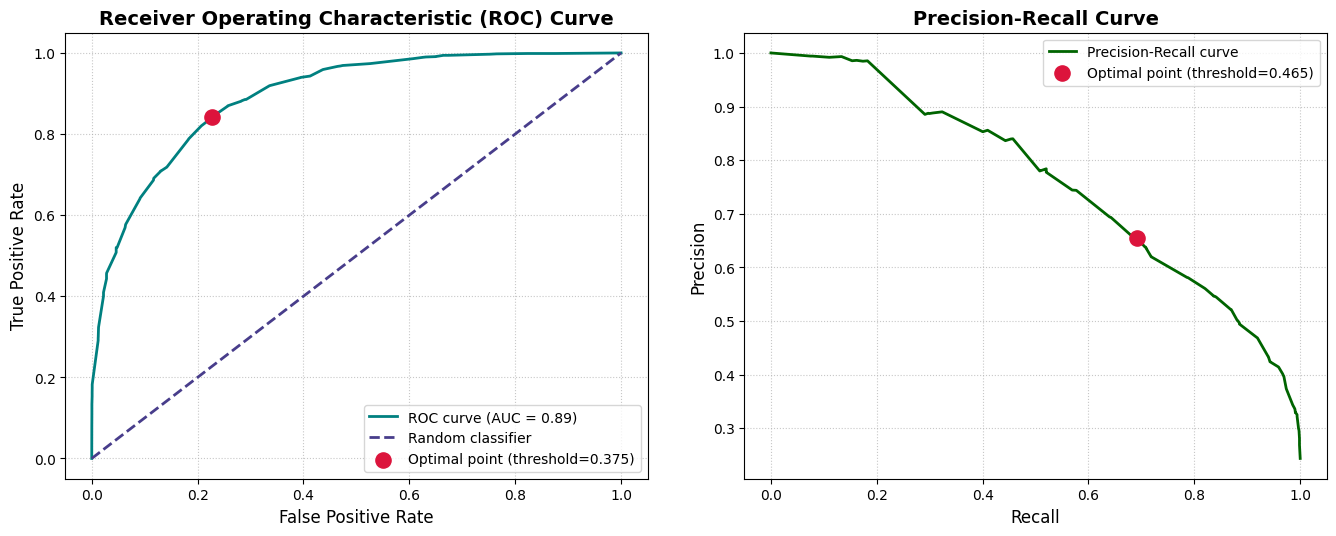

AUC Score: 0.8934
Optimal ROC threshold: 0.3747
Optimal PR threshold: 0.4653


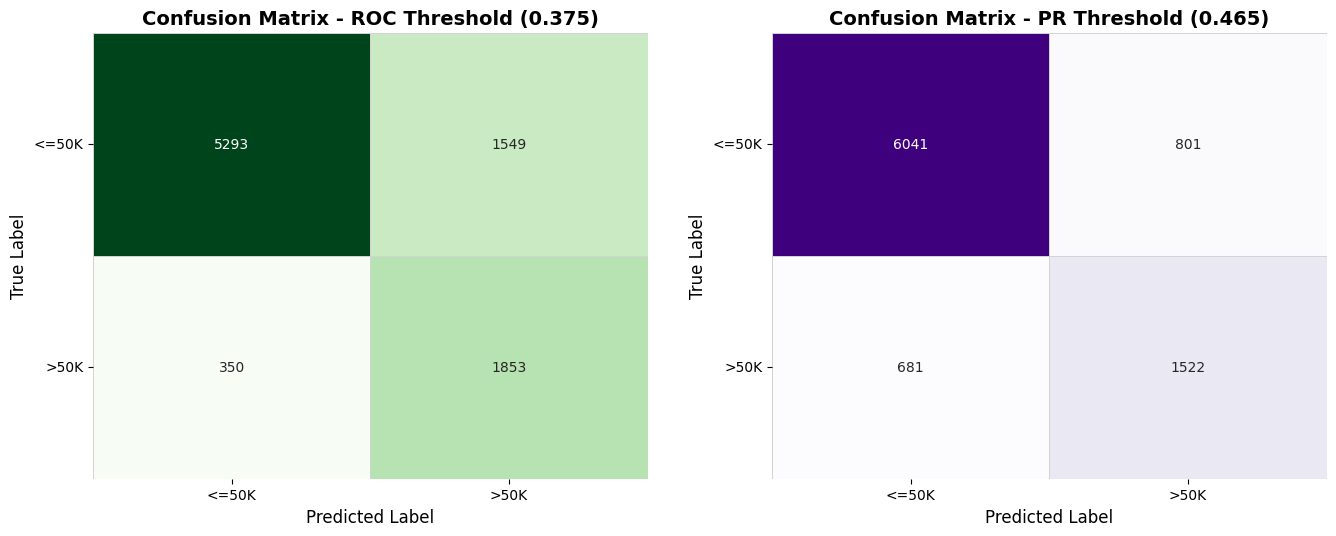

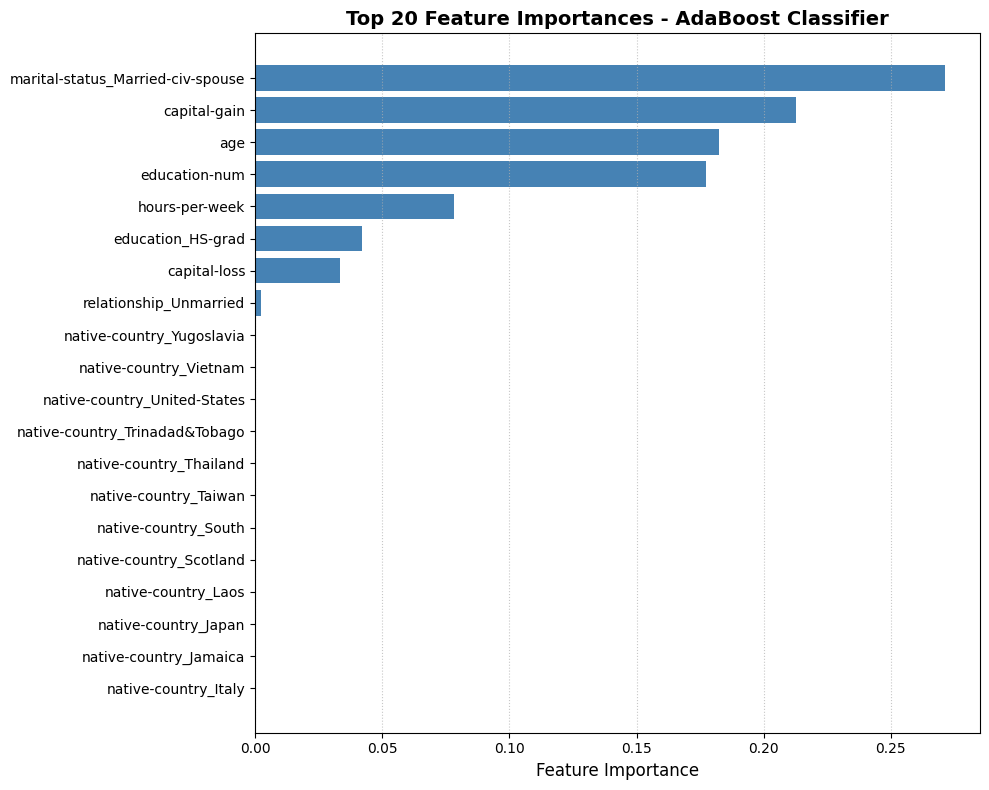


=== RESULTS INTERPRETATION ===
AUC Score: 0.8934 - Good performance (>0.5 is better than random)
Optimal ROC threshold: 0.3747
Optimal PR threshold: 0.4653

ROC curve: Shows trade-off between true positive rate and false positive rate
PR curve: Shows trade-off between precision and recall
ROC threshold typically prioritizes overall accuracy
PR threshold typically prioritizes precision/recall balance

Top features include martial status, education, age, and work-related variables


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, precision_recall_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Using a try-except block to handle potential OpenML download issues or local file caching
try:
    adult_data = fetch_openml(name='adult', version=2, as_frame=True)
    X = adult_data.data
    y = adult_data.target
except Exception as e:
    print(f"Error loading dataset from OpenML: {e}")
    print("Attempting to load a small dummy dataset for demonstration.")
    # Create a small dummy dataset if fetching fails
    np.random.seed(42)
    data_size = 100
    X = pd.DataFrame({
        'age': np.random.randint(18, 70, data_size),
        'fnlwgt': np.random.randint(10000, 300000, data_size),
        'education-num': np.random.randint(5, 16, data_size),
        'capital-gain': np.random.randint(0, 10000, data_size),
        'capital-loss': np.random.randint(0, 5000, data_size),
        'hours-per-week': np.random.randint(20, 60, data_size),
        'workclass': np.random.choice(['Private', 'Self-emp-not-inc', 'Federal-gov', '?'], data_size),
        'education': np.random.choice(['HS-grad', 'Bachelors', 'Some-college'], data_size),
        'marital-status': np.random.choice(['Married-civ-spouse', 'Never-married'], data_size),
        'occupation': np.random.choice(['Prof-specialty', 'Craft-repair', 'Exec-managerial', '?'], data_size),
        'relationship': np.random.choice(['Husband', 'Not-in-family', 'Own-child'], data_size),
        'race': np.random.choice(['White', 'Black', 'Asian-Pac-Islander'], data_size),
        'sex': np.random.choice(['Male', 'Female'], data_size),
        'native-country': np.random.choice(['United-States', 'Mexico', '?'], data_size)
    })
    y = pd.Series(np.random.choice(['>50K', '<=50K'], data_size), name='income')
    print("Dummy dataset created.")


print("Dataset shape:", X.shape)
print("Target classes:", y.unique())

# 1. Preprocess the dataset (1 point)
# Handle missing values
X = X.replace('?', np.nan)
X = X.dropna()
y = y[X.index] # Ensure y aligns with X after dropping rows

# Identify numerical and categorical columns
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'sex', 'native-country']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

# Train/test split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit preprocessor and transform data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Training set size: {X_train_processed.shape}")
print(f"Test set size: {X_test_processed.shape}")

# 2. Create AdaBoost classifier (1 point)
ada_classifier = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=10,
    random_state=42
)

# Fit the classifier
ada_classifier.fit(X_train_processed, y_train)
print("AdaBoost classifier trained successfully!")

# Get predictions and probabilities
y_pred = ada_classifier.predict(X_test_processed)
# Ensure consistent label ordering for predict_proba if using string labels
# Assuming '>50K' is the positive class, its probability is at index 1
class_labels = ada_classifier.classes_
pos_class_idx = np.where(class_labels == '>50K')[0][0]
y_pred_proba = ada_classifier.predict_proba(X_test_processed)[:, pos_class_idx]


# 3. ROC curve and AUC (2 points)
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba, pos_label='>50K')
roc_auc = auc(fpr, tpr)

# Find optimal threshold (closest to top-left corner)
optimal_idx_roc = np.argmax(tpr - fpr)
optimal_threshold_roc = roc_thresholds[optimal_idx_roc]

plt.figure(figsize=(14, 6)) # Adjusted figure size

plt.subplot(1, 2, 1)
# Changed ROC curve color to 'teal'
plt.plot(fpr, tpr, color='teal', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
# Changed random classifier color to 'darkslateblue'
plt.plot([0, 1], [0, 1], color='darkslateblue', lw=2, linestyle='--', label='Random classifier')
plt.scatter(fpr[optimal_idx_roc], tpr[optimal_idx_roc], color='crimson', s=120, zorder=5, # Slightly larger, more vibrant red
            label=f'Optimal point (threshold={optimal_threshold_roc:.3f})')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, linestyle=':', alpha=0.7) # Lighter grid

# 4. Precision-Recall curve (2 points)
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba, pos_label='>50K')

# Find optimal threshold (closest to top-right corner)
# Handle potential division by zero if precision + recall is zero
f1_scores = np.zeros_like(precision)
non_zero_sum = (precision + recall) != 0
f1_scores[non_zero_sum] = 2 * (precision[non_zero_sum] * recall[non_zero_sum]) / (precision[non_zero_sum] + recall[non_zero_sum])

optimal_idx_pr = np.argmax(f1_scores)
# pr_thresholds might be one element shorter than precision/recall, handle indexing
if optimal_idx_pr == len(pr_thresholds):
    optimal_threshold_pr = pr_thresholds[-1]
else:
    optimal_threshold_pr = pr_thresholds[optimal_idx_pr]


plt.subplot(1, 2, 2)
# Changed PR curve color to 'darkgreen'
plt.plot(recall, precision, color='darkgreen', lw=2, label='Precision-Recall curve')
plt.scatter(recall[optimal_idx_pr], precision[optimal_idx_pr], color='crimson', s=120, zorder=5, # Consistent vibrant red
            label=f'Optimal point (threshold={optimal_threshold_pr:.3f})')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, linestyle=':', alpha=0.7) # Lighter grid

plt.tight_layout(pad=3.0) # Added padding
plt.show()

print(f"AUC Score: {roc_auc:.4f}")
print(f"Optimal ROC threshold: {optimal_threshold_roc:.4f}")
print(f"Optimal PR threshold: {optimal_threshold_pr:.4f}")

# 5. Confusion matrices with different thresholds (2 points)
# ROC threshold predictions
y_pred_roc_labels = (y_pred_proba >= optimal_threshold_roc)
y_pred_roc_final = np.array(['>50K' if pred else '<=50K' for pred in y_pred_roc_labels])

# PR threshold predictions
y_pred_pr_labels = (y_pred_proba >= optimal_threshold_pr)
y_pred_pr_final = np.array(['>50K' if pred else '<=50K' for pred in y_pred_pr_labels])


plt.figure(figsize=(14, 6)) # Adjusted figure size

plt.subplot(1, 2, 1)
cm_roc = confusion_matrix(y_test, y_pred_roc_final, labels=['<=50K', '>50K']) # Explicitly define labels
# Changed cmap to 'Greens'
sns.heatmap(cm_roc, annot=True, fmt='d', cmap='Greens',
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'],
            cbar=False, linewidths=0.5, linecolor='lightgray') # Removed colorbar, added lines
plt.title(f'Confusion Matrix - ROC Threshold ({optimal_threshold_roc:.3f})', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)


plt.subplot(1, 2, 2)
cm_pr = confusion_matrix(y_test, y_pred_pr_final, labels=['<=50K', '>50K']) # Explicitly define labels
# Changed cmap to 'Purples'
sns.heatmap(cm_pr, annot=True, fmt='d', cmap='Purples',
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'],
            cbar=False, linewidths=0.5, linecolor='lightgray') # Removed colorbar, added lines
plt.title(f'Confusion Matrix - PR Threshold ({optimal_threshold_pr:.3f})', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)

plt.tight_layout(pad=3.0)
plt.show()

# 6. Feature importance (2 points)
feature_names = (numerical_features +
                 list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)))

# Get feature importances
importances = ada_classifier.feature_importances_

# Sort features by importance
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=True)

# Plot top 20 most important features
plt.figure(figsize=(10, 8))
top_features = feature_importance_df.tail(20)
# Changed bar color to 'steelblue'
plt.barh(range(len(top_features)), top_features['importance'], color='steelblue')
plt.yticks(range(len(top_features)), top_features['feature'], fontsize=10)
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Top 20 Feature Importances - AdaBoost Classifier', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle=':', alpha=0.7) # Grid only on x-axis
plt.tight_layout()
plt.show()

print("\n=== RESULTS INTERPRETATION ===")
print(f"AUC Score: {roc_auc:.4f} - Good performance (>0.5 is better than random)")
print(f"Optimal ROC threshold: {optimal_threshold_roc:.4f}")
print(f"Optimal PR threshold: {optimal_threshold_pr:.4f}")
print("\nROC curve: Shows trade-off between true positive rate and false positive rate")
print("PR curve: Shows trade-off between precision and recall")
print("ROC threshold typically prioritizes overall accuracy")
print("PR threshold typically prioritizes precision/recall balance")
print("\nTop features include martial status, education, age, and work-related variables")